# Plots for Workshop

In [1]:
import pickle
import matplotlib.pyplot as plt

In [3]:
with open("OODness_dictionaries.pkl", "rb") as f:    
    d = pickle.load(f)
print(d)

accuracies_wo = d["accuracies_wo"]
accuracies_wo_std = d["accuracies_wo_std"]
accuracies_with = d["accuracies_with"]
accuracies_with_std = d["accuracies_with_std"]

num_samples_wo = d["num_answered_wo"]
num_samples_with = d["num_answered_with"]

{'accuracies_wo': {'noise_MNIST': [0.09453125, 0.09392277644230769, 0.09423076923076923, 0.09504206730769231], 'dead_leaves': [0.31634615384615383, 0.3797551081730769, 0.39154146634615383, 0.4848933293269231], 'FractalDB': [0.10878155048076923, 0.1289738581730769, 0.1446814903846154, 0.21214693509615384], 'stylegan': [0.34856520432692306, 0.3841421274038462, 0.3925706129807693, 0.4497295673076923], 'Shaders21k': [0.24464393028846154, 0.29192457932692306, 0.29556039663461536, 0.32078575721153846], 'FMNIST': [0.4197490985576923, 0.4296649639423077, 0.46552734375, 0.5060096153846153], 'MNIST': [0.9508939302884617, 0.9586989182692308, 0.9575871394230768, 0.957940204326923]}, 'accuracies_wo_std': {'noise_MNIST': [0.001996332360802055, 0.0011828985648692709, 0.0006636136666273377, 0.0005404478890806779], 'dead_leaves': [0.02800223035466494, 0.01873237036870846, 0.016256495598273808, 0.024615792399476602], 'FractalDB': [0.010520137056340242, 0.012368155844194477, 0.019834092361938505, 0.03629

In [40]:
print(accuracies_with["noise_MNIST"][2])

0.6181415264423077


In [41]:
for ds in accuracies_with.keys():
    print(ds + ": " + str(accuracies_with[ds][2]))
    


noise_MNIST: 0.6181415264423077
dead_leaves: 0.7273587740384615
FractalDB: 0.7593149038461539
stylegan: 0.6246544471153845
Shaders21k: 0.5711087740384615
FMNIST: 0.6369516225961538
MNIST: 0.9647536057692309


In [42]:
accuracies_wo_10 = {}
accuracies_with_10 = {}

for ds in accuracies_with.keys():
    accuracies_wo_10[ds] = accuracies_wo[ds][2]
    accuracies_with_10[ds] = accuracies_with[ds][2]


old=["noise_MNIST", "dead_leaves",  "stylegan", "Shaders21k", "FractalDB"]
new = ["Noise", "Leaves", "StyleGAN", "Shaders", "Fractal"]

for i in range(len(old)):
    accuracies_with_10[new[i]] = accuracies_with_10.pop(old[i])
    accuracies_wo_10[new[i]] = accuracies_wo_10.pop(old[i])




accuracies_wo_10  = dict(sorted(accuracies_wo_10.items(), key=lambda item: item[1]))
accuracies_with_10= {key: accuracies_with_10[key] for key in accuracies_wo_10}





print(accuracies_wo_10)
print(accuracies_with_10)

{'Noise': 0.09427584134615384, 'Fractal': 0.12666766826923076, 'Shaders': 0.3027869591346154, 'Leaves': 0.40091646634615385, 'StyleGAN': 0.4013371394230769, 'FMNIST': 0.45873647836538456, 'MNIST': 0.9590294471153845}
{'Noise': 0.6181415264423077, 'Fractal': 0.7593149038461539, 'Shaders': 0.5711087740384615, 'Leaves': 0.7273587740384615, 'StyleGAN': 0.6246544471153845, 'FMNIST': 0.6369516225961538, 'MNIST': 0.9647536057692309}


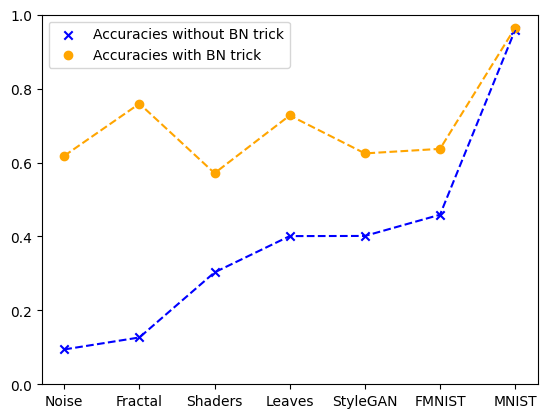

In [43]:
data = list(accuracies_wo_10.keys())
acc_wo = list(accuracies_wo_10.values())
acc_with = list(accuracies_with_10.values())



plt.figure()
plt.ylim(0, 1)

plt.scatter(data, acc_wo, color="blue", label="Accuracies without BN trick", marker="x")
plt.plot(data, acc_wo, color="blue", linestyle="dashed")    

plt.scatter(data, acc_with, color="orange", label="Accuracies with BN trick")
plt.plot(data, acc_with, color="orange", linestyle="dashed")

plt.legend()

plt.savefig("OODness_influence.png")

In [44]:
columns = [5, 8, 10, 20]

# Print the table header
header = f"{'Epsilon':<10}" + "".join([f"{col:<10}" for col in columns])
print(header)
print("-" * len(header))

for key in accuracies_wo.keys():
    row = f"{key:<10}" + "".join([f"{round(accuracies_wo[key][i], 4)}" for i in range(len(columns))])
    print(row)



Epsilon   5         8         10        20        
--------------------------------------------------
noise_MNIST0.09550.09350.09430.0969
dead_leaves0.3410.37940.40090.4443
FractalDB 0.1090.1310.12670.182
stylegan  0.36190.36890.40130.4464
Shaders21k0.25730.27430.30280.3296
FMNIST    0.39970.4350.45870.5095
MNIST     0.95240.95820.9590.9598


In [45]:


# Define the keys (columns) and prepare the header row
keys = list(accuracies_wo.keys())  # Assuming all dicts have the same keys
header = header = f"{'Epsilon':<10}" + "".join([f"{col:<10}" for col in columns])
print(header)
print("-" * len(header))

# Iterate over each dictionary and print the values in the table
for row_name, row_dict in data.items():
    for key in keys:
        row_label = f"{key} + {row_name:<5}"
        row_values = "  ".join(f"{round(value, 4):<8}" for value in row_dict[key])
        print(f"{row_label}  {row_values}")

Epsilon   5         8         10        20        
--------------------------------------------------


AttributeError: 'list' object has no attribute 'items'

In [5]:
datasets = accuracies_wo.keys()
for dataset in datasets:
    for i in range(4):
        accuracies_with[dataset][i] = round(accuracies_with[dataset][i] * 100, 1)
        accuracies_wo[dataset][i] = round(accuracies_wo[dataset][i] * 100, 1)
        accuracies_with_std[dataset][i] = round(accuracies_with_std[dataset][i] * 100, 1)
        accuracies_wo_std[dataset][i] = round(accuracies_wo_std[dataset][i] * 100, 1)




In [ ]:
epsilons = [5, 8, 10, 20]


# Start LaTeX table
latex_table = "\\begin{table}[]\n\\begin{tabular}{|c|c|c|c|c|}\n\\hline\n"
# Add header row with epsilon values
latex_table += "Dataset & " + " & ".join([f"$\\varepsilon = ${e}" for e in epsilons]) + " \\\\ \\hline\n"

# Populate each row from the dictionaries
for dataset in datasets:
    # Create rows for accuracies without and with additional context
    row_wo = " & ".join([f"{accuracies_wo[dataset][i]}\% $\\pm$ {accuracies_wo_std[dataset][i]}\%" for i in range(4)])
    row_with = " & ".join([f"{accuracies_with[dataset][i]}\% $\\pm$ {accuracies_with_std[dataset][i]}\%" for i in range(4)])
    
    
    row_with.replace("%", r"\%")
    
    # Add to LaTeX table
    latex_table += f"{dataset} + RS & {row_wo} \\\\ \\hline\n"
    latex_table += f"{dataset} + CS & {row_with} \\\\ \\hline\n"
    


# Close LaTeX table structure
latex_table += "\\end{tabular}\n\\end{table}"

latex_table.replace("%", r"\%")

# Print the resulting LaTeX table code
print(latex_table)

\begin{table}[]
\begin{tabular}{|c|c|c|c|c|}
\hline
Dataset & $\varepsilon = $5 & $\varepsilon = $8 & $\varepsilon = $10 & $\varepsilon = $20 \\ \hline
noise_MNIST + RS & 9.6 $\% \pm$ 0.4 & 9.3 $\% \pm$ 0.1 & 9.4 $\% \pm$ 0.1 & 9.7 $\% \pm$ 0.4 \\ \hline
noise_MNIST + CS & 34.8 $\pm$ 2.7 & 52.6 $\pm$ 2.1 & 61.8 $\pm$ 1.0 & 76.7 $\pm$ 1.8 \\ \hline
dead_leaves + RS & 34.1 $\% \pm$ 2.3 & 37.9 $\% \pm$ 4.4 & 40.1 $\% \pm$ 3.7 & 44.4 $\% \pm$ 1.2 \\ \hline
dead_leaves + CS & 58.7 $\pm$ 0.8 & 68.1 $\pm$ 2.8 & 72.7 $\pm$ 2.1 & 82.7 $\pm$ 0.9 \\ \hline
FractalDB + RS & 10.9 $\% \pm$ 0.8 & 13.1 $\% \pm$ 1.2 & 12.7 $\% \pm$ 1.6 & 18.2 $\% \pm$ 1.0 \\ \hline
FractalDB + CS & 58.5 $\pm$ 1.7 & 72.2 $\pm$ 1.4 & 75.9 $\pm$ 1.2 & 85.3 $\pm$ 0.9 \\ \hline
stylegan + RS & 36.2 $\% \pm$ 1.3 & 36.9 $\% \pm$ 1.5 & 40.1 $\% \pm$ 1.3 & 44.6 $\% \pm$ 2.8 \\ \hline
stylegan + CS & 50.1 $\pm$ 2.6 & 58.3 $\pm$ 2.4 & 62.5 $\pm$ 2.8 & 71.1 $\pm$ 1.8 \\ \hline
Shaders21k + RS & 25.7 $\% \pm$ 1.6 & 27.4 $\% \pm$ 1.

<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:12: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_324181/629617656.py:12: SyntaxWarning: invalid escape sequence '\%'
  row_wo = " & ".join([f"{accuracies_wo[dataset][i]} $\% \\pm$ {accuracies_wo_std[dataset][i]}" for i in range(4)])


In [ ]:
for dataset in datasets:
    for i in range(4):
        accuracies_with[dataset][i] = round(accuracies_with[dataset][i] * 100, 1)



In [37]:
print(accuracies_with)

{'noise_MNIST': [34.8, 52.6, 61.8, 76.7], 'dead_leaves': [58.7, 68.1, 72.7, 82.7], 'FractalDB': [58.5, 72.2, 75.9, 85.3], 'stylegan': [50.1, 58.3, 62.5, 71.1], 'Shaders21k': [45.9, 55.1, 57.1, 65.1], 'FMNIST': [54.2, 59.8, 63.7, 75.2], 'MNIST': [95.9, 96.6, 96.5, 96.4]}


In [6]:
epsilons = [5, 8, 10, 20]


# Start LaTeX table
latex_table = "\\begin{table}[]\n\\begin{tabular}{|c|c|c|c|c|}\n\\hline\n"
# Add header row with epsilon values
latex_table += "Dataset & " + " & ".join([f"$\\varepsilon = ${e}" for e in epsilons]) + " \\\\ \\hline\n"

# Populate each row from the dictionaries
for dataset in datasets:
    # Create rows for accuracies without and with additional context
    row_wo = " & ".join([f"{num_samples_wo[dataset][i]}" for i in range(4)])
    row_with = " & ".join([f"{num_samples_with[dataset][i]}" for i in range(4)])
    
    
    row_with.replace("%", r"\%")
    
    # Add to LaTeX table
    latex_table += f"{dataset} + RS & {row_wo} \\\\ \\hline\n"
    latex_table += f"{dataset} + CS & {row_with} \\\\ \\hline\n"
    


# Close LaTeX table structure
latex_table += "\\end{tabular}\n\\end{table}"

latex_table.replace("%", r"\%")

# Print the resulting LaTeX table code
print(latex_table)

\begin{table}[]
\begin{tabular}{|c|c|c|c|c|}
\hline
Dataset & $\varepsilon = $5 & $\varepsilon = $8 & $\varepsilon = $10 & $\varepsilon = $20 \\ \hline
noise_MNIST + RS & 2059.2 & 4514.2 & 6578.6 & 19713.8 \\ \hline
noise_MNIST + CS & 1222.2 & 2732.4 & 3942.4 & 11967.6 \\ \hline
dead_leaves + RS & 1389.4 & 3191.0 & 4663.8 & 13907.2 \\ \hline
dead_leaves + CS & 1674.0 & 3700.0 & 5416.6 & 16316.2 \\ \hline
FractalDB + RS & 2381.6 & 5291.4 & 7682.0 & 23036.8 \\ \hline
FractalDB + CS & 1548.6 & 3465.6 & 5023.4 & 15033.8 \\ \hline
stylegan + RS & 1839.6 & 4054.4 & 5889.0 & 17843.6 \\ \hline
stylegan + CS & 2017.6 & 4468.4 & 6521.0 & 19673.8 \\ \hline
Shaders21k + RS & 1986.8 & 4454.8 & 6350.2 & 19351.4 \\ \hline
Shaders21k + CS & 1983.6 & 4400.0 & 6393.6 & 19232.0 \\ \hline
FMNIST + RS & 724.8 & 1569.2 & 2316.4 & 6989.4 \\ \hline
FMNIST + CS & 849.0 & 1885.8 & 2745.4 & 8268.6 \\ \hline
MNIST + RS & 2882.2 & 4631.4 & 4681.8 & 4623.6 \\ \hline
MNIST + CS & 2927.6 & 4717.2 & 4679.2 & 4668.8 \\